<a href="https://www.kaggle.com/code/parthamajumdar/detecting-spam-sms-using-naive-bayes-algorithm?scriptVersionId=106483787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In this notebook, we will explore Python code for implementing **Naive Bayes algorithm** to detect **spam SMS**. SMS is a service provided by Mobile service providers using which Mobile users can send messages to other Mobile users. SMS stands for **Short Messaging Service**. Using SMS, Mobile users can send message which can at the most contain 160 characters. The messages can contain any character and can include hyperlinks.

The model being built is a **Supervised Learning** model. In other words, we will feed data containing spam SMS and good SMS along with labels regarding which SMS is a spam SMS and which SMS is a good SMS into the machine and make the machine learn to detect spam SMS and good SMS. Once the model is ready, if we feed any SMS to the model, the model should respond by stating whether the input SMS is a spam SMS or a good SMS.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data

The first step in building a supervised learning model is to load the data based on which the model will be prepared. The data for building this model is available in the file **[spamSMSDataset.csv](https://drive.google.com/file/d/1BA_TG8czxacEj0tq-q4QzhlPgYqAYhBp/view?usp=sharing)**. We will use the **pandas** **read_csv()** function to read the data into a pandas dataframe.

In [2]:
# Import the pandas library
import pandas as pd

In [3]:
# Read the data into a dataframe and display the dataframe
df = pd.read_csv('../input/spam-sms-dataset/spam.csv', encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


If the dataframe is uploaded correctly, you will notice that the dataframe has 5 columns and 5572 rows. The columns should be named v1, v2, Unnamed: 2, Unnamed: 3, Unnamed: 4. The column v2 contains the SMS text and the column v1 contains the label when the associated SMS text in column v2 is a Spam SMS or a Good SMS. We only need the columns v1 and v2. So, we will first retain only the columns v1 and v2.

In [4]:
df = df[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Here, column v2 is our independent variable and the column v1 is the dependent variable.

Let us see the unique values in this column v1.

In [5]:
# Checking the unique values in the column v1 in the dataframe df
df.v1.unique()

array(['ham', 'spam'], dtype=object)

Notice that the column v1 has 2 values - ham and spam. Here, **ham** indicates that the corresponding SMS is a good SMS and **spam** indicates that the corresponding SMS is a spam SMS.

Let us check how many SMS of the 2 types we have in the dataset.

In [6]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

We see that the dataset is not balanced as number of good SMS examples are nearly 7 times that of the number of spam SMS.

Now, the column v1 (which is our dependent variable) contains the text 'ham' or 'spam'. However, we know that the computer cannot make anything out of the text available in the column **v1**. So, we have to convert the contents of the column **v1** to numbers. We will use **Label Encoder** to encode the values in the column v1 to numbers. Label Encoders pick up the unique values in a column and assign a value starting with 0 till (n - 1), where n is the number of unique values in the column.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['v1'])
print(df.head())
print('\nUnique values of the column "label"', df.label.unique())

     v1                                                 v2  label
0   ham  Go until jurong point, crazy.. Available only ...      0
1   ham                      Ok lar... Joking wif u oni...      0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3   ham  U dun say so early hor... U c already then say...      0
4   ham  Nah I don't think he goes to usf, he lives aro...      0

Unique values of the column "label" [0 1]


Let us take the contents of the column v2 to a variable X. X will be our independent variable.

And let us take the contents of the column label to a variable Y. Y will be our dependent variable.

In [8]:
X = df['v2']
y = df['label']

## Creating and Training and Test sets


We will split the data at random so that we have 2 sets. We will use one set for training our model and the other set to validate the goodness of the model. We will split the data such that 90% of the data is used for training and the rest 10% will be used for validation.

To split the data into training and test sets, we will use the function **train_test_split()** from the **Scikit-Learn** library.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)
print("Number of data points in the training set = %d" % (X_train.shape[0]))
print("Number of data points in the test set = %d" % (X_test.shape[0]))

Number of data points in the training set = 5014
Number of data points in the test set = 558


train_test_split() returns 4 datasets. We have captured these datasets in the variables X_train, X_test, y_train, y_test. X_train contains 90% (in our case) of the rows from the original dataset (i.e. X) chosen at random and only contains the columns related to the independent variables. y_train contains the corresponding values of the dependent variable with relation to the dataset X_train. X_test contains the rest of the 10% of the rows from the original dataset (i.e. X) and contains only the columns corresponding to the independent variables. y_test contains the corresponding values of the dependent variable with relation to the dataset X_test.

We will train the model using X_train and y_train.

We will test the model by making predictions using X_test.

We will measure the goodness of the model by comparing the predictions made on X_test to the actual values in y_test.

## Pre-processing the data

As stated before, we need to find a way to represent the text data as numbers. One way to do this is by preparing **TF-IDF (Term Frequency - Inverse Document Frequency)** every data point. We refer to such a data as a vector of TF-IDFs. However, before we create the vector of TF-IDFs, we can remove non essential words/elements from our data.

Among the non essential words/elements are the following:
1. Commonly used words like a, an, the, etc. These are referred to as **Stop Words**.
2. Punctuations and Special Characters
3. URLs
4. Numbers
5. Extra white spaces

Among the above categories, URL is a special category. Generally, spam SMS contain some URLs. As we cannot let the computer infer from the URL, we will make a column in our X dataframe to contain a value of 1 if an URL is present in X and a 0 if there is no URL in the X. Let us do this first.

### Function to detect whether one or more URLs is present in the text

Let us write function to detect whether one or more URL is present in a provided text. The function return a 1 is one or more URL is present in the text and remove the URL from the text. The function should return a 0 if the text contains not SMS.

In [10]:
import re

def identifyAndRemoveURLs(text, remove = True):
    present = re.search(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', text)
    if present:
        if remove:
            return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text), 1
        else:
            return text, 1
    else:
        return text, 0

Let us test this function.

In [11]:
print('Example 1:', identifyAndRemoveURLs("Click this link to register - https://www.fake.com OR this link for information - http://info.org or download this file - file://test.txt"))
print('Example 2:', identifyAndRemoveURLs('This contains no URLs'))

Example 1: ('Click this link to register -  OR this link for information -  or download this file - ', 1)
Example 2: ('This contains no URLs', 0)


Let us now apply this function on the training dataset and remove all the URLs from the text. Also, let us make a new Series called URLPresent which will contain a 1 or 0 to indicate whether the corresponding text in X_train contained a URL or not respectively.

Once we have converted X_train to TF-IDF, we will add URLPresent to the TF-iDF to form the data to be used for training the model.

In [12]:
URLPresent = pd.Series([identifyAndRemoveURLs(text)[1] for text in X_train])
X_train = pd.Series([identifyAndRemoveURLs(text)[0] for text in X_train])

print('New Text:\n', X_train.head())
print('\nURL Present Indicator:\n', URLPresent.head())

New Text:
 0    LookAtMe!: Thanks for your purchase of a video...
1          Aight, I'll hit you up when I get some cash
2                           Don no da:)whats you plan?
3                        Going to take your babe out ?
4    No need lar. Jus testing e phone card. Dunno n...
dtype: object

URL Present Indicator:
 0    0
1    0
2    0
3    0
4    0
dtype: int64


### Functions to remove non essential elements from the data

We will now write functions to remove the non essential elements from the data. We will then collected all these individual functions into a single function so that they could be applied as a whole on the complete dataset.

#### Function to remove Stop Words

We can get a list of Stop Words in English from the **Natural Language Tool Kit (nltk)** library. We will get this list and from every data point we will remove these words.

In [13]:
# Import the required libraries 
import nltk
from   nltk.corpus import stopwords
from   nltk.tokenize import word_tokenize

# Gather the list of Stop Words
stopWordList = nltk.corpus.stopwords.words('english')

# Function to remove Stop Words
def removeStopWords(text):
    # splitting strings into tokens (list of words)
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    # filtering out the stop words
    filtered_tokens = [token for token in tokens if token not in stopWordList]
    filtered_text = ' '.join(filtered_tokens) 
    
    return filtered_text

We now test our function.

We will pass all the data in our test string in lower case.

This is because we will convert all the data in our text column to lower case before building the model.

In [14]:
removeStopWords("This is a test of Stop Word remover".lower())

'test stop word remover'

However, we will not be supplying one row at a time to this function. We will want all the rows in our dataframe to be treated by this function. To do this, we will use the code below.

*As we are just testing the function, we will make a copy of the dataset and try the function on that copy. This way, we will not disturb our original dataset which we will treat later.*

In [15]:
dfXDemo = X_train.copy()
print("Original")
print(X_train.head())
dfXDemo = dfXDemo.apply(removeStopWords)
print("\nAfter removing Stop Words")
print(dfXDemo.head())

Original
0    LookAtMe!: Thanks for your purchase of a video...
1          Aight, I'll hit you up when I get some cash
2                           Don no da:)whats you plan?
3                        Going to take your babe out ?
4    No need lar. Jus testing e phone card. Dunno n...
dtype: object

After removing Stop Words
0    LookAtMe ! : Thanks purchase video clip LookAt...
1                         Aight , I 'll hit I get cash
2                              Don da : ) whats plan ?
3                                    Going take babe ?
4    No need lar . Jus testing e phone card . Dunno...
dtype: object


The **apply()** function passes one row at a time from the dataset to the function (in this case the function is removeStopWords()) and sends the output of the function to the destination variable.

#### Function to remove Special Characters

Next, we remove all the special characters from the text. Now, this is a debatable case as spam emails might contain some sequences of special characters. So, ideally we should have been classifying them as well. However, for the sake of simplicity, we will remove the special characters from the text.

In [16]:
import re

def removeSpecialCharacters(text):
    pattern = r'[^a-zA-z0-9\s]'
    return re.sub(pattern, '', text)

This function replaces any character in the input which is not an alphabet or a digit or a space character with an empty string. So, in the process, any character other than alphabets and digits and space character gets eliminated from the input.

Let us test this function.

In [17]:
removeSpecialCharacters("'This'; is a #test $tring, sent: to @someone.")

'This is a test tring sent to someone'

#### Function to remove Numbers

Numbers in the text will definitely not help us identify a spam mail. So, we remove all the numbers present in the text.

In [18]:
import re

def removeNumbers(text):
    return re.sub('([0-9]+)', '', text)

Let us test our function.

In [19]:
removeNumbers("This text contains 66 numbers and 1654 characters.")

'This text contains  numbers and  characters.'

#### Function to remove extra spaces

Extra Spaces contribute nothing to building the model. Extra Spaces may be present in the raw data and/or could have been introduced due to the operations we performed earlier. So, we need to remove them.

In [20]:
def removeExtraWhiteSpaces(text):
    return " ".join(text.split())

Let us test our code.

In [21]:
removeExtraWhiteSpaces("This   is a    test of removing     extra white    spaces")

'This is a test of removing extra white spaces'

### Putting together the functions to create a single function to clean the data

We now put together all the individual functions we have written so far so that we have a single function which can clean the input data. We will run this function on the Training dataset first and get to the next step in formulating the training data.

In [22]:
def cleanData(text):
    text = removeSpecialCharacters(text)
    text = removeStopWords(text)
    text = removeNumbers(text)
    text = removeExtraWhiteSpaces(text)
    
    return text

Now that our function is ready, we will apply this function on our input data. We will treat only the text in the X_train dataset for the moment as this is what we will use for training our model.

Before applying the function, we convert all the data to lower case. This is so that all the similar words appear the same. For example, the word "Same" may be used in the text as "Same", "SAME", "same" or in any other way. If we do not convert all the text to either lower case or upper case, all the different representations of the same word will appear as distinct entities. Having the same word as different entities does not add any value to the Spam Detector. Suppose, we consider that the word "free" is used in Spams. So, we need to find out how frequently the word "free" is used in the text of an SMS. Here, if we give a different treatment to the different representations of the word "free", then our model will become weak.

In [23]:
X_train = X_train.str.lower()
X_train = X_train.apply(cleanData)
X_train.head()

0    lookatme thanks purchase video clip lookatme y...
1                               aight ill hit get cash
2                                         dawhats plan
3                                      going take babe
4    need lar jus testing e phone card dunno networ...
dtype: object

### Convert our text matter to numbers

Now that we have a clean set of data, we need to convert this text data to numbers so that the computer can use it to model the data. There are number of ways to convert text data to numbers. We will see 2 such methods.

#### Convert using TF-IDF Vectoriser

We will now create the **TF-IDF Vectors**. 

To create the TF-IDF Vectors, we will use the **TfidfVectorizer** from the SciKit-Learn library as shown below.

In [24]:
from   sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 0, use_idf = True, ngram_range = (1, 4))
tfidfText = tfidf.fit_transform(X_train)
print('Shape of original Training Data:', X_train.shape)
print('Shape of transformed Training Data:', tfidfText.shape)

Shape of original Training Data: (5014,)
Shape of transformed Training Data: (5014, 87653)


So, we see that we originally had one column containing all the text. After transforming using TfidfVectorizer, we now have 87653 columns.

Let us see what this transformed data looks like.

In [25]:
tfidfText.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

We convert the TF-IDF vectors to a dataframe as shown below.

In [26]:
dfTrain = pd.DataFrame(tfidfText.todense(), columns=tfidf.get_feature_names())
dfTrain

,____,____ joys,____ joys father,____ joys father ans,_ll,_ll finish,_ll finish buying,_ll submitting,_ll submitting da,_ll submitting da project,...,zoom cine,zoom cine actually,zoom cine actually tonight,zouk,zouk nichols,zouk nichols parisfree,zouk nichols parisfree roses,zs,zs subscription,zs subscription pw
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To the above dataframe, we will add the series URLPresent which indicates whether the text contained a URL or not.

In [27]:
dfTrain['URLPresent'] = URLPresent
dfTrain.head()

,____,____ joys,____ joys father,____ joys father ans,_ll,_ll finish,_ll finish buying,_ll submitting,_ll submitting da,_ll submitting da project,...,zoom cine actually,zoom cine actually tonight,zouk,zouk nichols,zouk nichols parisfree,zouk nichols parisfree roses,zs,zs subscription,zs subscription pw,URLPresent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Implementing Naive Bayes algorithm for Spam Detection using Scikit-Learn

Now let us use the library provided in Scikit-Learn to implement Naive Bayes algorithm for Spam Detection.

There are many variations of Naive Bayes implementation provided in Scikit-Learn. We will discuss **Multinomial Naive Bayes** as this variation has been written for specifically implementing Naive Bayes algorithm on TF-IDF Vectors.

### Building the Multinomial Naive Bayes model

For building the model, we need the training data and the associated labels. We built the TF-IDF vectors for the training data set and stored it in dfTrain. We have the corresponding labels in y_train. Using this, we can build our model as shown below.

In [28]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(dfTrain.values, y_train)

MultinomialNB()

Now our model has been prepared. Let us test how the model is working on the training set.

To test the model, we need to make predictions from the model. As we are testing the training set first, we make predictions on the training dataset, i.e. dfTrain and compare the predictions with y_train. The below code demonstrates making prediction on the training dataset using our model.

In [29]:
yTrainPred = mnb.predict(dfTrain.values)

To compare the predictions made by the model with the actual data, we can use the **Confusion Matrix** as shown below.

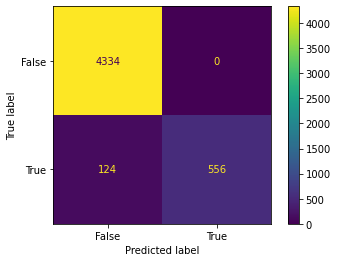

In [30]:
from   sklearn import metrics
import matplotlib.pyplot as plt

confusionMatrix = metrics.confusion_matrix(y_train, yTrainPred)
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cmDisplay.plot()
plt.show()

From the above confusion matrix, we see that 4334 good SMS were truly classified by the model as good SMS and 556 spam SMS were classified by the model as spams. The model classified 0 good SMS as spam and 124 spam emails as good SMS.

So, the accuracy of the model is (4334 + 556) / (4334 + 556 + 0 + 124)

In [31]:
print("Training Accuracy = %5.5f" % ((4334 + 556) / (4334 + 556 + 0 + 124)))

Training Accuracy = 0.97527


We can also calculate the accuracy using functions available in Scikit-Learn as shown below.

In [32]:
print("Training Accuracy = %5.5f" % (metrics.accuracy_score(y_train, yTrainPred)))

Training Accuracy = 0.97527


### Validating the model on the test dataset

We have seen the accuracy of the model on the training data. However, training dataset was the dataset on which the model was built. We will now feed the test dataset (which the model has not yet seen) and check the accuracy of the model.

We have kept the text dataset in the variable X_test and the corresponding labels in y_test. Before we can apply the model on the test dataset, we must transform the test dataset just like we transformed the training dataset. The below steps transform the test dataset.

In [33]:
URLPresentTest = pd.Series([identifyAndRemoveURLs(text)[1] for text in X_test])
X_test = pd.Series([identifyAndRemoveURLs(text)[0] for text in X_test])
X_test = X_test.str.lower()
X_test = X_test.apply(cleanData)
X_test.head()

0    funny fact nobody teaches volcanoes erupt tsun...
1    sent scores sophas secondary application schoo...
2     know someone know fancies call find pobox lshb p
3    promise getting soon youll text morning let kn...
4    congratulations ur awarded either cd gift vouc...
dtype: object

In [34]:
tfidfTestText = tfidf.transform(X_test)
dfTest = pd.DataFrame(tfidfTestText.todense(), columns=tfidf.get_feature_names())
dfTest['URLPresent'] = URLPresentTest
print('Shape of original Test Data:', X_test.shape)
print('Shape of transformed Test Data:', dfTest.shape)

Shape of original Test Data: (558,)
Shape of transformed Test Data: (558, 87654)


The important aspect to notice is that we applied the same instance of TF-IDF Vectorizer that we used for the training dataset. This is because we fit the TF-IDF Vectorizer on the training dataset and we **only transformed the test data using the fit we generated from the training dataset**.

Now that we have transformed the test dataset, we can use to make predictions using the model we developed.

In [35]:
yTestPred = mnb.predict(dfTest.values)

Let us generate the Confusion Matrix for the predictions made on the test dataset and check the goodness of the model.

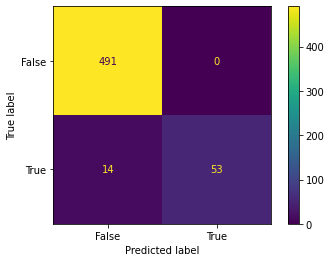

In [36]:
confusionMatrix = metrics.confusion_matrix(y_test, yTestPred)
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cmDisplay.plot()
plt.show()

Let us check the test accuracy of our model.

In [37]:
print("Test Accuracy = %5.5f" % (metrics.accuracy_score(y_test, yTestPred)))

Test Accuracy = 0.97491


### Making predictions using our model

We can feed new SMS in our model and get the predictions from the model. As I do not have a SMS, I will use a simple sentence in English language as shown below. Here, I am explainning the mechanics and the same mechanics can be used by applying on real data.

In [38]:
testSMS = "This is a test SMS to be checked for spam"
URLPresentInSMS = identifyAndRemoveURLs(testSMS)[1]
testSMS = identifyAndRemoveURLs(testSMS)[0]
testSMS = testSMS.lower()
testSMS = cleanData(testSMS)
testSMS

'test sms checked spam'

In [39]:
import numpy as np

tfidfTestSMS = tfidf.transform([testSMS])
arrTestSMS = tfidfTestSMS.toarray()
arrTestSMS = np.append(arrTestSMS, URLPresentInSMS).reshape(1, -1)
arrTestSMS.shape

(1, 87654)

In [40]:
prediction = mnb.predict(arrTestSMS)
le.inverse_transform(prediction)

array(['ham'], dtype=object)

So, our model predicts that if the text is as we have given, then the SMS could be a good.

Let us try one more example.

In [41]:
testSMS = "You won the lottery. Click this link http://fake.com as soon as possible"
URLPresentInSMS = identifyAndRemoveURLs(testSMS)[1]
testSMS = identifyAndRemoveURLs(testSMS)[0]
testSMS = testSMS.lower()
testSMS = cleanData(testSMS)
tfidfTestSMS = tfidf.transform([testSMS])
arrTestSMS = tfidfTestSMS.toarray()
arrTestSMS = np.append(arrTestSMS, URLPresentInSMS).reshape(1, -1)

prediction = mnb.predict(arrTestSMS)
le.inverse_transform(prediction)

array(['spam'], dtype=object)

Our model predicted that this SMS could be a spam.